# Laptop - Analysis

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

#### Format

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
format_bold = '\033[1m'
format_end = '\033[0m'

# 

## Load the date

In [4]:
# https://www.kaggle.com/muhammetvarl/laptop-price

path = '../Datasets/Laptop Prices/laptops.csv'

In [5]:
df = pd.read_csv(path, encoding='latin-1')

# 

## Let's take a look

In [6]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1,339.69"
1,2,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2,537.45"
4,5,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1,803.60"


In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 914.6 KB


In [8]:
df.select_dtypes(include=['object']).describe()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


In [9]:
df.select_dtypes(exclude=['object']).describe()

,Unnamed: 0,Inches,Price_euros
count,"1,303.00","1,303.00","1,303.00"
mean,660.16,15.02,"1,123.69"
std,381.17,1.43,699.01
min,1.00,10.10,174.00
25%,331.50,14.00,599.00
50%,659.00,15.60,977.00
75%,990.50,15.60,"1,487.88"
max,"1,320.00",18.40,"6,099.00"


# 

## Data Cleaning

In [10]:
# removing the unnamed/index column

df.drop(columns='Unnamed: 0', inplace=True)

In [11]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1,339.69"
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2,537.45"
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1,803.60"


In [12]:
# checking for missing values

df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [13]:
# the number of duplicated rows

df.duplicated().sum()

28

In [14]:
# the duplicated rows

df[df.duplicated(keep=False)].sort_values(by=['Company','Product']).head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1263,Acer,Aspire ES1-531,Notebook,15.60,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1277,Acer,Aspire ES1-531,Notebook,15.60,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1291,Acer,Aspire ES1-531,Notebook,15.60,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.60,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00
1288,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.60,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.60,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00
1269,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.60,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.60,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.60,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1261,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.30,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00


In [15]:
# removing the duplicated rows

df.drop_duplicates(inplace=True)

# 

### What's next?:
#### - cleaning the columns: Ram, Memory, Wieght.
#### - changing the type of columns: Company, TypesName, OpsSys and maybe more.

# 

#### ➥ cleaning the 'Ram' column

In [16]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [17]:
# I'm going to remove the two words 'GB' from each row and I have to rename the columns from Ram to something like Ram GB

df['Ram'].str.replace('GB', '')

0        8
1        8
2        8
3       16
4        8
        ..
1270     4
1271    16
1272     2
1273     6
1274     4
Name: Ram, Length: 1275, dtype: object

In [18]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# 

#### ➥ cleaning the 'Memory' column

In [19]:
df['Memory'].str.split(' ', n=1)

0                 [128GB, SSD]
1       [128GB, Flash Storage]
2                 [256GB, SSD]
3                 [512GB, SSD]
4                 [256GB, SSD]
                 ...          
1270              [128GB, SSD]
1271              [512GB, SSD]
1272     [64GB, Flash Storage]
1273                [1TB, HDD]
1274              [500GB, HDD]
Name: Memory, Length: 1275, dtype: object

In [20]:
df['Memory'].str.split(' ', n=1).str[0].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [21]:
print('\n -> As we can see in this list of unique values, we got a bad format: 1.0TB\n')
print(' -> It\'s a bad format only if we want to change from text (object) column to a number (integer) column.\n')


 -> As we can see in this list of unique values, we got a bad format: 1.0TB

 -> It's a bad format only if we want to change from text (object) column to a number (integer) column.



In [22]:
storage = df['Memory'].str.split(' ', n=1).str[0]

In [23]:
storage

0       128GB
1       128GB
2       256GB
3       512GB
4       256GB
        ...  
1270    128GB
1271    512GB
1272     64GB
1273      1TB
1274    500GB
Name: Memory, Length: 1275, dtype: object

In [24]:
type_storage = df['Memory'].str.split(' ', n=1).str[1]

In [25]:
type_storage

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1270              SSD
1271              SSD
1272    Flash Storage
1273              HDD
1274              HDD
Name: Memory, Length: 1275, dtype: object

In [26]:
storage.apply(lambda x: re.split('([a-zA-Z]+)', x))

0       [128, GB, ]
1       [128, GB, ]
2       [256, GB, ]
3       [512, GB, ]
4       [256, GB, ]
           ...     
1270    [128, GB, ]
1271    [512, GB, ]
1272     [64, GB, ]
1273      [1, TB, ]
1274    [500, GB, ]
Name: Memory, Length: 1275, dtype: object

In [27]:
storage.apply(lambda x: re.split('([a-zA-Z]+)', x)).str[0].unique()

array(['128', '256', '512', '500', '1', '32', '64', '2', '1.0', '16',
       '180', '240', '8', '508'], dtype=object)

In [28]:
storage.apply(lambda x: re.split('([a-zA-Z]+)', x)).str[1].unique()

array(['GB', 'TB'], dtype=object)

In [29]:
storage.apply(lambda x: re.split('([a-zA-Z]+)', x) ).str[2].unique()

array([''], dtype=object)

In [30]:
storage[storage.str.contains('TB')].unique()

array(['1TB', '2TB', '1.0TB'], dtype=object)

In [31]:
storage[storage.str.contains('\.')]

151     1.0TB
1010    1.0TB
1075    1.0TB
1135    1.0TB
1158    1.0TB
1176    1.0TB
1258    1.0TB
1266    1.0TB
Name: Memory, dtype: object

In [32]:
storage.loc[1265:1268,]

1265      1TB
1266    1.0TB
1267      1TB
1268     32GB
Name: Memory, dtype: object

In [33]:
storage.loc[1265:1268,].str.replace('.0', '', regex=False)

1265     1TB
1266     1TB
1267     1TB
1268    32GB
Name: Memory, dtype: object

In [34]:
storage = storage.str.replace('.0', '', regex=False)

calc_capacity = storage.apply(lambda x: re.split('([a-zA-Z]+)', x))

In [35]:
calc_capacity

0       [128, GB, ]
1       [128, GB, ]
2       [256, GB, ]
3       [512, GB, ]
4       [256, GB, ]
           ...     
1270    [128, GB, ]
1271    [512, GB, ]
1272     [64, GB, ]
1273      [1, TB, ]
1274    [500, GB, ]
Name: Memory, Length: 1275, dtype: object

In [36]:
storage = calc_capacity.apply(lambda element: int(element[0]) if element[1] == 'GB' else (int(element[0]) * 1000 if element[1] == 'TB' else 'Something\'s wrong here!'))

In [37]:
storage

0        128
1        128
2        256
3        512
4        256
        ... 
1270     128
1271     512
1272      64
1273    1000
1274     500
Name: Memory, Length: 1275, dtype: int64

In [38]:
df['Memory'] = storage

In [39]:
df['Storage Type'] = type_storage

In [40]:
rename_columns={
    'Ram': 'Ram (GB)',
    'Memory': 'Storage Memory (GB)',
    'Weight': 'Weight (kg)'
}

df.rename(columns=rename_columns, inplace=True)

In [41]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Storage Memory (GB),Gpu,OpSys,Weight (kg),Price_euros,Storage Type
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37kg,"1,339.69",SSD
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34kg,898.94,Flash Storage
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86kg,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83kg,"2,537.45",SSD
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37kg,"1,803.60",SSD


In [42]:
actual_columns = list(df.columns)
actual_columns.remove('Storage Type')

reorder_columns = []

for col in actual_columns:
    if col == 'Storage Memory (GB)':
        reorder_columns.append(col)
        reorder_columns.append('Storage Type')        
    else:
        reorder_columns.append(col)


In [43]:
df = df.loc[:, reorder_columns]

In [44]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Storage Memory (GB),Storage Type,Gpu,OpSys,Weight (kg),Price_euros
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1,339.69"
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,SSD,AMD Radeon Pro 455,macOS,1.83kg,"2,537.45"
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1,803.60"


# 

In [45]:
df['Weight (kg)'].apply(lambda x: re.split('([a-zA-Z]+)', x))

0       [1.37, kg, ]
1       [1.34, kg, ]
2       [1.86, kg, ]
3       [1.83, kg, ]
4       [1.37, kg, ]
            ...     
1270     [1.8, kg, ]
1271     [1.3, kg, ]
1272     [1.5, kg, ]
1273    [2.19, kg, ]
1274     [2.2, kg, ]
Name: Weight (kg), Length: 1275, dtype: object

In [46]:
df['Weight (kg)'].apply(lambda x: re.split('([a-zA-Z]+)', x)).str[1].unique()

array(['kg'], dtype=object)

In [47]:
df['Weight (kg)'] = df['Weight (kg)'].apply(lambda x: re.split('([a-zA-Z]+)', x)).str[0].astype(float)

In [48]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Storage Memory (GB),Storage Type,Gpu,OpSys,Weight (kg),Price_euros
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37,"1,339.69"
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,SSD,AMD Radeon Pro 455,macOS,1.83,"2,537.45"
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37,"1,803.60"


In [49]:
df.shape

(1275, 13)

In [50]:
df.dtypes

Company                 object
Product                 object
TypeName                object
Inches                 float64
ScreenResolution        object
Cpu                     object
Ram (GB)                 int32
Storage Memory (GB)      int64
Storage Type            object
Gpu                     object
OpSys                   object
Weight (kg)            float64
Price_euros            float64
dtype: object

In [51]:
df.select_dtypes(include='object').describe()

,Company,Product,TypeName,ScreenResolution,Cpu,Storage Type,Gpu,OpSys
count,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,40,118,12,110,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,SSD,Intel HD Graphics 620,Windows 10
freq,291,30,707,505,190,631,279,1048


# 

In [52]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Storage Memory (GB),Storage Type,Gpu,OpSys,Weight (kg),Price_euros
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37,"1,339.69"
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,SSD,AMD Radeon Pro 455,macOS,1.83,"2,537.45"
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37,"1,803.60"


In [53]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   Cpu                  1275 non-null   object 
 6   Ram (GB)             1275 non-null   int32  
 7   Storage Memory (GB)  1275 non-null   int64  
 8   Storage Type         1275 non-null   object 
 9   Gpu                  1275 non-null   object 
 10  OpSys                1275 non-null   object 
 11  Weight (kg)          1275 non-null   float64
 12  Price_euros          1275 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 792.4 KB


In [54]:
change_types = {
    'Company':'category',
    'TypeName':'category',
    'ScreenResolution':'category',
    'Cpu':'category',
    'Storage Type':'category',
    'Gpu':'category',
    'OpSys':'category'
}

df = df.astype(change_types)

In [55]:
df.dtypes

Company                category
Product                  object
TypeName               category
Inches                  float64
ScreenResolution       category
Cpu                    category
Ram (GB)                  int32
Storage Memory (GB)       int64
Storage Type           category
Gpu                    category
OpSys                  category
Weight (kg)             float64
Price_euros             float64
dtype: object

In [56]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company              1275 non-null   category
 1   Product              1275 non-null   object  
 2   TypeName             1275 non-null   category
 3   Inches               1275 non-null   float64 
 4   ScreenResolution     1275 non-null   category
 5   Cpu                  1275 non-null   category
 6   Ram (GB)             1275 non-null   int32   
 7   Storage Memory (GB)  1275 non-null   int64   
 8   Storage Type         1275 non-null   category
 9   Gpu                  1275 non-null   category
 10  OpSys                1275 non-null   category
 11  Weight (kg)          1275 non-null   float64 
 12  Price_euros          1275 non-null   float64 
dtypes: category(7), float64(3), int32(1), int64(1), object(1)
memory usage: 220.7 KB


# 

In [57]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Storage Memory (GB),Storage Type,Gpu,OpSys,Weight (kg),Price_euros
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37,"1,339.69"
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,SSD,AMD Radeon Pro 455,macOS,1.83,"2,537.45"
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37,"1,803.60"


In [58]:
frequency = df['Cpu'].astype('object')

In [59]:
frequency.head(10)

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
5       AMD A9-Series 9420 3GHz
6          Intel Core i7 2.2GHz
7          Intel Core i5 1.8GHz
8    Intel Core i7 8550U 1.8GHz
9    Intel Core i5 8250U 1.6GHz
Name: Cpu, dtype: object

# 

## Data Visualization

#### - What company has the most variety of laptops?
#### - What is the average price of a laptop by company?
#### - What are the most expensive laptops by company?
#### - What are the best top 5 Laptops reported by the price?

# 

### What company has the most variety of laptops?

In [60]:
count_laptops = df['Company'].value_counts(sort=True, ascending=True)

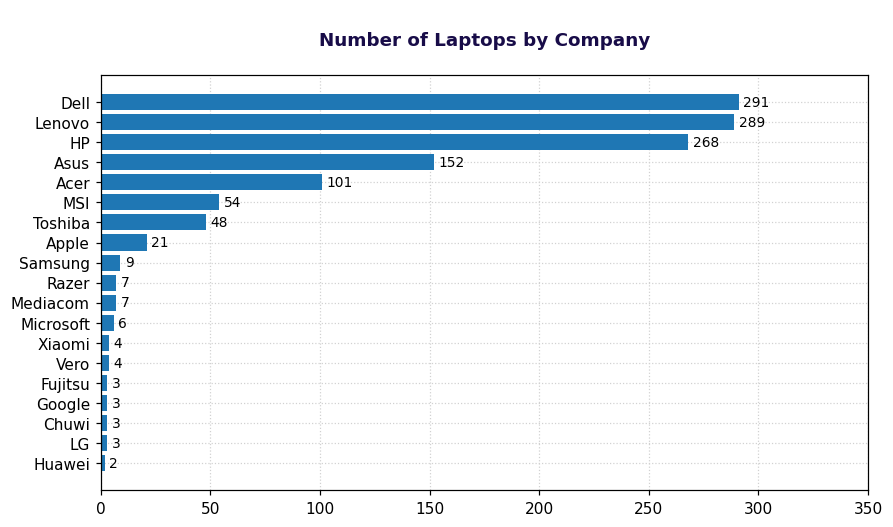

In [61]:
fig, ax = plt.subplots(figsize=(9,5), dpi=110)

plt.barh(count_laptops.index, count_laptops)

plt.title('\nNumber of Laptops by Company\n', color='#180C48', fontsize=12, fontweight='bold')
plt.xticks(ticks= np.arange(0, 351, 50))

for idx, val in enumerate(count_laptops):
    ax.text(val+2, idx, str(val), va='center', fontsize=9)



ax.set_axisbelow(True)
ax.grid(color='#D1D1D1', linestyle='dotted')
plt.show()


In [62]:
num_laptops = count_laptops.sort_values(ascending=False)
num_laptops = num_laptops.rename('Number of Laptops')

In [63]:
percent_laptops = count_laptops.sort_values(ascending=False) / count_laptops.sum() * 100
percent_laptops = percent_laptops.apply(lambda x: str(round(x, 2)) + '%')
percent_laptops = percent_laptops.rename('Percentage of Laptops')

In [64]:
df_num_laptops = pd.concat([num_laptops, percent_laptops], axis=1)

In [65]:
print('\n -> The best 5 companies with a lot of laptop variety are:\n')
df_num_laptops[:5]


 -> The best 5 companies with a lot of laptop variety are:



,Number of Laptops,Percentage of Laptops
Dell,291,22.82%
Lenovo,289,22.67%
HP,268,21.02%
Asus,152,11.92%
Acer,101,7.92%


# 

### What's the average price of a laptop by the company?

In [66]:
average_price = df.loc[:, ['Company','Price_euros']].groupby('Company').mean()

In [67]:
average_price = average_price.sort_values('Price_euros')

In [68]:
average_price

,Price_euros
Company,
Vero,217.43
Mediacom,295.00
Chuwi,314.30
Acer,633.46
Fujitsu,729.00
HP,"1,080.31"
Lenovo,"1,093.86"
Asus,"1,123.83"
Xiaomi,"1,133.46"


In [69]:
average_price = average_price['Price_euros'].apply(lambda x: np.round(x, 2))

In [70]:
average_price

Company
Vero          217.42
Mediacom      295.00
Chuwi         314.30
Acer          633.46
Fujitsu       729.00
HP          1,080.31
Lenovo      1,093.86
Asus        1,123.83
Xiaomi      1,133.46
Dell        1,199.23
Toshiba     1,267.81
Samsung     1,413.44
Huawei      1,424.00
Apple       1,564.20
Microsoft   1,612.31
Google      1,677.67
MSI         1,728.91
LG          2,099.00
Razer       3,346.14
Name: Price_euros, dtype: float64

In [71]:
average_price_text_format = average_price.apply(lambda x: '€' + str(x) if len(str(x).split('.')[-1]) == 2 else '€' + str(x) + '0') 

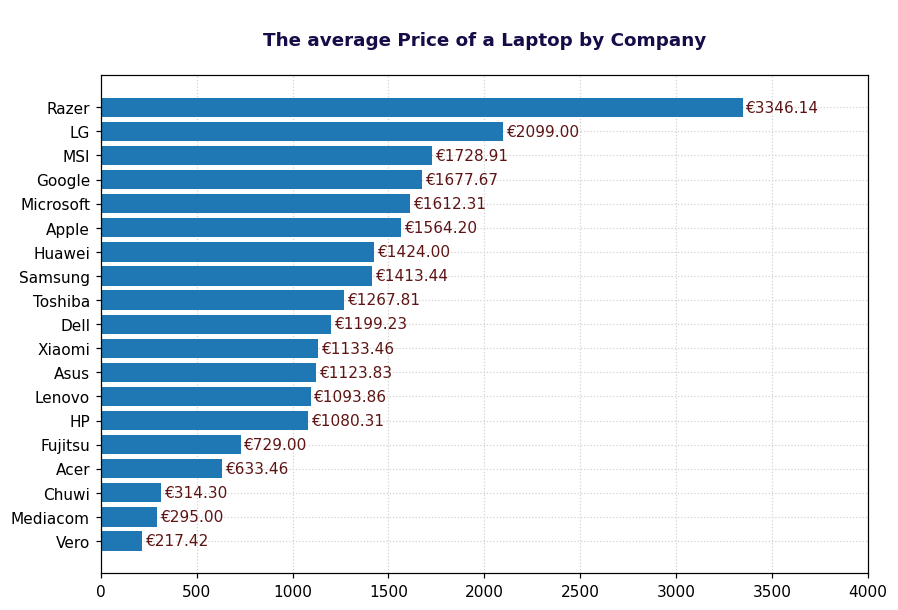

In [72]:
fig, ax = plt.subplots(figsize=(9,6), dpi=110)

plt.barh(average_price.index, average_price)

plt.title('\nThe average Price of a Laptop by Company\n', color='#180C48', fontsize=12, fontweight='bold')
plt.xticks(ticks=np.arange(0, 4001, 500))

for (idx, val), price in zip(enumerate(average_price), average_price_text_format):
    ax.text(val+20, idx, price, va='center', color='#5F1414', fontweight='light')


ax.set_axisbelow(True)
ax.grid(color='#D1D1D1', linestyle='dotted')
plt.show()

# 

### What are the best top 5 Laptops?

In [73]:
top5_laptops = df.sort_values('Price_euros', ascending=False).head(5)

In [74]:
top5_laptops

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Storage Memory (GB),Storage Type,Gpu,OpSys,Weight (kg),Price_euros
196,Razer,Blade Pro,Gaming,17.30,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1000,SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,"6,099.00"
830,Razer,Blade Pro,Gaming,17.30,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512,SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,"5,499.00"
610,Lenovo,Thinkpad P51,Notebook,15.60,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32,1000,SSD,Nvidia Quadro M2200M,Windows 10,2.50,"4,899.00"
749,HP,Zbook 17,Workstation,17.30,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256,SSD,Nvidia Quadro M2000M,Windows 7,3.00,"4,389.00"
1066,Asus,ROG G701VO,Gaming,17.30,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1000,SSD,Nvidia GeForce GTX 980,Windows 10,3.58,"3,975.00"


In [75]:
top5_laptops['Laptop'] = top5_laptops['Company'].astype('object') + ' ' + top5_laptops['Product'].astype('object')

In [76]:
top5_laptops = top5_laptops.loc[:, ['Laptop', 'Price_euros']]
top5_laptops = top5_laptops.reset_index(drop=True)

In [77]:
condition = top5_laptops['Price_euros'] == 6099.00

top5_laptops.loc[condition, 'Laptop'] = 'Razer Blade Pro '

In [78]:
top5_laptops

,Laptop,Price_euros
0,Razer Blade Pro,"6,099.00"
1,Razer Blade Pro,"5,499.00"
2,Lenovo Thinkpad P51,"4,899.00"
3,HP Zbook 17,"4,389.00"
4,Asus ROG G701VO,"3,975.00"


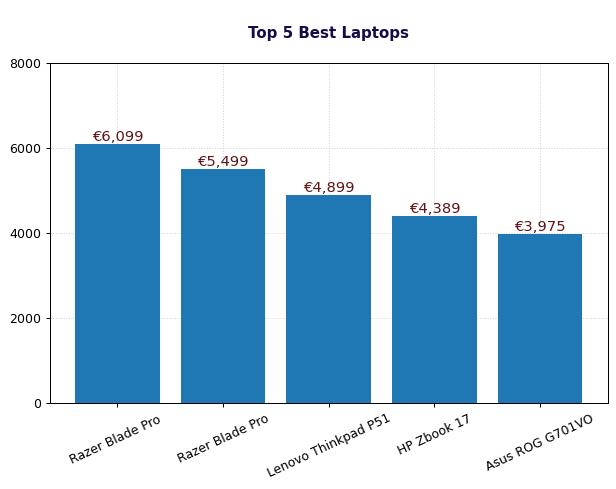

In [79]:
fig, ax = plt.subplots(figsize=(8,5), dpi=90)


plt.bar(top5_laptops['Laptop'], top5_laptops['Price_euros'])


plt.title('\nTop 5 Best Laptops\n', color='#180C48', fontsize=12, fontweight='bold')
plt.xticks(rotation=25)
plt.yticks(ticks=np.arange(0, 8001, 2000))

for idx, val in enumerate(top5_laptops['Price_euros']):
    ax.text(idx, val+80, f'€{round(val):,}', ha='center', color='#5F1414', fontweight='light', fontsize=11.8)


ax.set_axisbelow(True)
ax.grid(color='#D1D1D1', linestyle='dotted')
plt.show()

# 